# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("creditcard.csv")
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
dataset.drop_duplicates()

dataset.shape

(284807, 31)

In [4]:
X = dataset.drop(columns="Class")
y = dataset["Class"]

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

y_pred_train = np.where(y_pred_train == 1, 0, 1)
y_pred_test = np.where(y_pred_test == 1, 0, 1)

print(f"Anomalies in training data {np.sum(y_pred_train)}")
print("Classification report")
print(classification_report(y_train, y_pred_train))

print(f"nomalies in test data {np.sum(y_pred_test)}")
print("Classification report")
print(classification_report(y_test, y_pred_test))

Anomalies in training data 21361
Classification report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.02      0.86      0.03       379

    accuracy                           0.90    213605
   macro avg       0.51      0.88      0.49    213605
weighted avg       1.00      0.90      0.95    213605

nomalies in test data 7038
Classification report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.01      0.89      0.03       113

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



In [ ]:
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
oc_svm.fit(X_train)

y_pred_train_svm = oc_svm.predict(X_train)
y_pred_test_svm = oc_svm.predict(X_test)

y_pred_train_svm = np.where(y_pred_train_svm == 1, 0, 1)
y_pred_test_svm = np.where(y_pred_test_svm == 1, 0, 1)

print(f"Number of anomalies in training data: {np.sum(y_pred_train_svm)}")

print("Classification report for training data: ")
print(classification_report(y_train, y_pred_train_svm))

print(f"Number of anomalies in test data: {np.sum(y_pred_test_svm)}")

print("Classification report for test data: ")
print(classification_report(y_test, y_pred_test_svm))

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred_train_lof = lof.fit_predict(X_train)
y_pred_test_lof = lof.fit_predict(X_test)

y_pred_train_lof = 1 - (y_pred_train_lof == 1).astype(int)
y_pred_test_lof = 1 - (y_pred_test_lof == 1).astype(int)

print(f"Anomalies in training data: {y_pred_train_lof.sum()}")

print("Training data classification report: ")
print(classification_report(y_train, y_pred_train_lof))

print(f"Anomalies in test data: {y_pred_test_lof.sum()}")

print("Test data classification report: ")
print(classification_report(y_test, y_pred_test_lof))


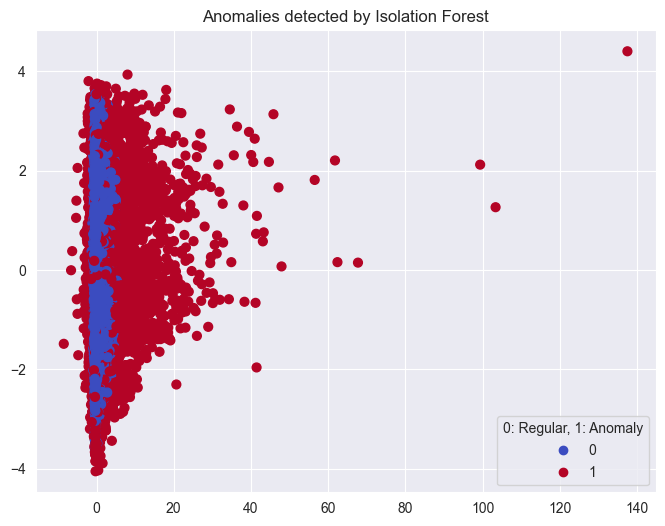

NameError: name 'y_pred_train_svm' is not defined

In [5]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

def plot_anomalies(X_pca, y_pred, model_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="coolwarm", s=40)
    ax.set_title(f"Anomalies detected by {model_name}")
    ax.legend(*scatter.legend_elements(), title="0: Regular, 1: Anomaly")
    plt.show()

plot_anomalies(X_train_pca, y_pred_train, "Isolation Forest")
plot_anomalies(X_train_pca, y_pred_train_svm, "One-Class SVM")
plot_anomalies(X_train_pca, y_pred_train_lof, "Local Outlier Factor")


In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32), nn.ReLU(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, input_dim), nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        return self.decoder(encoded)

model = Autoencoder(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=64, shuffle=True)

for epoch in range(20):
    total_loss = 0
    for inputs, in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/20, Loss: {total_loss / len(train_loader):.4f}")

with torch.no_grad():
    reconstruction_error = ((model(X_test_tensor) - X_test_tensor) ** 2).mean(dim=1)

threshold = np.percentile(reconstruction_error.numpy(), 95)
y_pred = (reconstruction_error.numpy() > threshold).astype(int)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error.numpy(), bins=50)
plt.axvline(threshold, color="r", linestyle="--", label=f"Threshold = {threshold:.4f}")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
Three anomaly detection methods were applied to the Credit Card Fraud Detection dataset: Isolation Forest, One-Class SVM, and Local Outlier Factor.

Deep neural networks in the form of autoencoders were also utilized.

Models were evaluated using Precision, Recall, F1-score, and Classification Report.

Traditional classification algorithms performed well in detecting normal clients (class 0), with high Precision and Recall. However, they struggled to identify anomalies (class 1), with low accuracy for the anomaly class despite overall high metrics.

Autoencoders yielded significantly better results in anomaly detection. They learn from normal data and then compare reconstructed data with the input, identifying anomalies with higher reconstruction errors, thus distinguishing them from normal clients.

The autoencoder achieved the highest F1 Score of 0.97.

Deep neural networks are more effective in learning complex patterns, making them better at detecting subtle anomalies that traditional models may miss.